In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r'C:\Users\hp\Documents\Data Analysis Courses\Data analysis projects\Adult Income dataset\Adult income dataset.csv')

## Project Overview

This project analyzes the Adult Income Dataset to predict whether a person earns more than $50K per year based on demographic and employment attributes.

In [3]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Data Cleaning

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
data.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [6]:
(data=='?').sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [7]:
# Replace " ?" with NaN
data.replace(' ?', np.nan, inplace=True)

# Drop rows with missing values
data.dropna(inplace=True)

In [8]:
# Check for whitespace issues
for col in data.select_dtypes(include='object').columns:
    print(col, data[col].apply(lambda x: x.startswith(' ') or x.endswith(' ')).sum())

workclass 0
education 0
marital-status 0
occupation 0
relationship 0
race 0
gender 0
native-country 0
income 0


In [9]:
# Check inconsistent categories
data.nunique()

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

In [10]:
# Convert income column to binary
data['income'] = data['income'].apply(lambda x: 1 if x == '>50K' else 0)

In [11]:
# Reset index
data.reset_index(drop=True, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.6+ MB


## Analysis & KPIs

#### KPI 1 — Percentage of people earning >50K

In [12]:
(data['income']==1).mean()*100

np.float64(23.928176569346054)

#### KPI 2 — Average Age of High Earners vs Low Earners

In [13]:
data.groupby('income')['age'].mean()

income
0    36.872184
1    44.275178
Name: age, dtype: float64

#### KPI 3 — Average Hours Worked Per Week (by income group)

In [14]:
data.groupby('income')['hours-per-week'].mean()

income
0    38.840048
1    45.452896
Name: hours-per-week, dtype: float64

#### KPI 4 — Income Distribution by Gender

In [15]:
data.groupby('gender')['income'].mean() *100  #This shows percentage of men vs women earning >50K.

gender
Female    10.925148
Male      30.376723
Name: income, dtype: float64

#### KPI 5 — Top 10 Education Levels by % earning >50K

In [16]:
(data.groupby('education')['income']
    .mean()
    .sort_values(ascending=False).head(10)*100)

education
Prof-school     73.980815
Doctorate       72.558923
Masters         54.911554
Bachelors       41.283489
Assoc-acdm      25.796377
Assoc-voc       25.327511
Some-college    18.964883
HS-grad         15.857831
12th             7.305936
7th-8th          6.492147
Name: income, dtype: float64

### KPI 6 — Top 10 Occupations by % earning >50K

In [17]:
data.groupby('occupation')['income'].mean().sort_values(ascending=False).head(10)*100

occupation
Exec-managerial      47.781794
Prof-specialty       45.106935
Armed-Forces         33.333333
Protective-serv      31.332655
Tech-support         29.045643
Sales                26.798692
Craft-repair         22.627618
Transport-moving     20.424628
Adm-clerical         13.687400
Machine-op-inspct    12.309729
Name: income, dtype: float64

### KPI 7 — Income by Workclass

In [18]:
(data.groupby('workclass')['income'].mean().sort_values(ascending=False)*100)

workclass
Self-emp-inc        55.339233
Federal-gov         39.175978
Local-gov           29.559949
Self-emp-not-inc    27.887105
State-gov           26.754165
Private             21.786704
Without-pay          9.523810
?                    9.467667
Never-worked         0.000000
Name: income, dtype: float64

### Does age strongly affect income?

In [19]:
data[['age','income']].corr()

,age,income
age,1.000000,0.230369
income,0.230369,1.000000


### Trend of income by age

In [20]:
# Create age buckets
data['age_group'] = pd.cut(data['age'], bins=[0, 25, 35, 45, 55, 65, 90],
                           labels=['0-25', '26-35', '36-45', '46-55', '56-65', '66+'])

# % income >50K by age group
age_income = data.groupby('age_group')['income'].mean() * 100
age_income


C:\Users\hp\AppData\Local\Temp\ipykernel_15328\2782328457.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_income = data.groupby('age_group')['income'].mean() * 100


age_group
0-25      1.755479
26-35    18.704301
36-45    34.563253
46-55    39.235776
56-65    31.406074
66+      19.800333
Name: income, dtype: float64

### Which marital status group earns the most?

In [22]:
data.groupby('marital-status')['income'].mean().sort_values(ascending=False)*100

marital-status
Married-civ-spouse       44.613253
Married-AF-spouse        37.837838
Divorced                 10.116086
Married-spouse-absent     9.235669
Widowed                   8.432148
Separated                 6.470588
Never-married             4.547993
Name: income, dtype: float64

## Visualizations

### Income Distribution (Bar Chart)

In [23]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'age_group'],
      dtype='object')

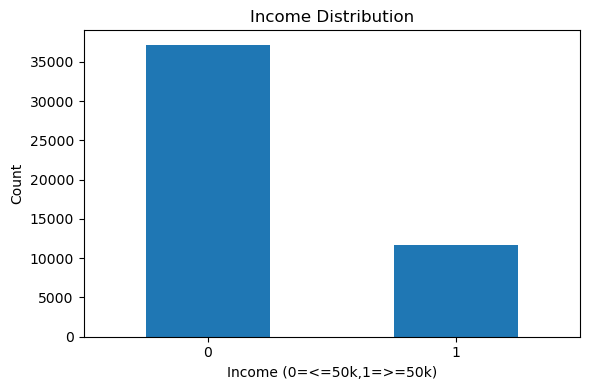

In [50]:
income_counts=data['income'].value_counts()

plt.figure(figsize=(6,4))
income_counts.plot(kind='bar')
plt.title('Income Distribution')
plt.xlabel('Income (0=<=50k,1=>=50k)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Income by Gender (Bar Chart)

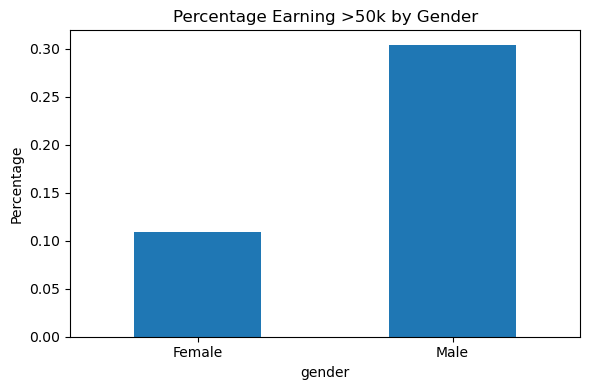

In [27]:
gender_income= data.groupby('gender')['income'].mean()

plt.figure(figsize=(6,4))
gender_income.plot(kind='bar')
plt.title('Percentage Earning >50k by Gender')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Income by Education Level (Top 10)

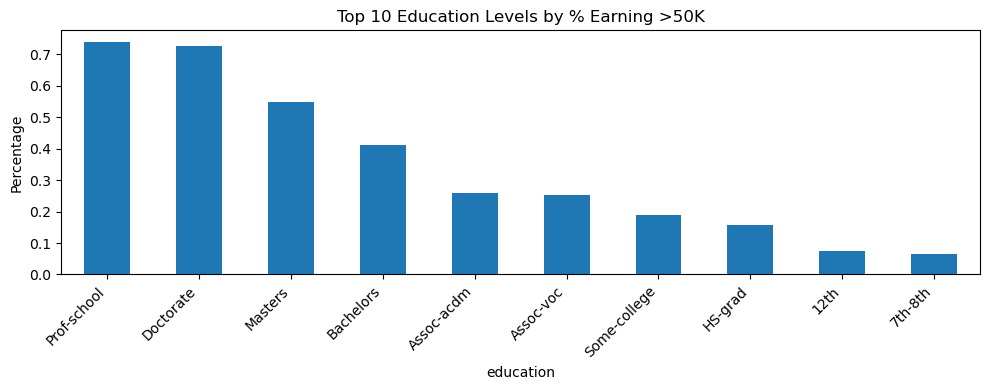

In [30]:
education_income = data.groupby('education')['income'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,4))
education_income.plot(kind='bar')
plt.title('Top 10 Education Levels by % Earning >50K')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Top 10 Occupations by % Earning >50K

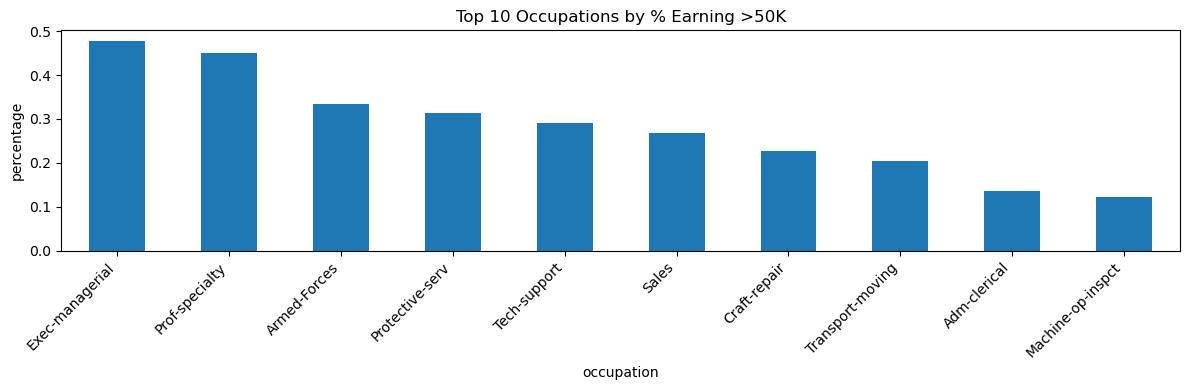

In [35]:
occupation_income = data.groupby('occupation')['income'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,4))
occupation_income.plot(kind='bar')
plt.title('Top 10 Occupations by % Earning >50K')
plt.ylabel('percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Income by Workclass

In [36]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'age_group'],
      dtype='object')

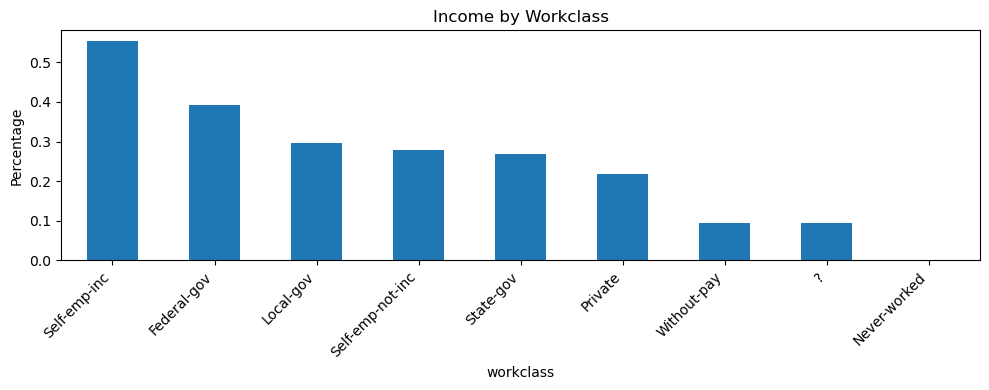

In [41]:
workclass_income= data.groupby('workclass')['income'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,4))
workclass_income.plot(kind='bar')
plt.title('Income by Workclass')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Income Trend by Age Group (Line Chart)

C:\Users\hp\AppData\Local\Temp\ipykernel_15328\1417765858.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_income = data.groupby('age_group')['income'].mean()


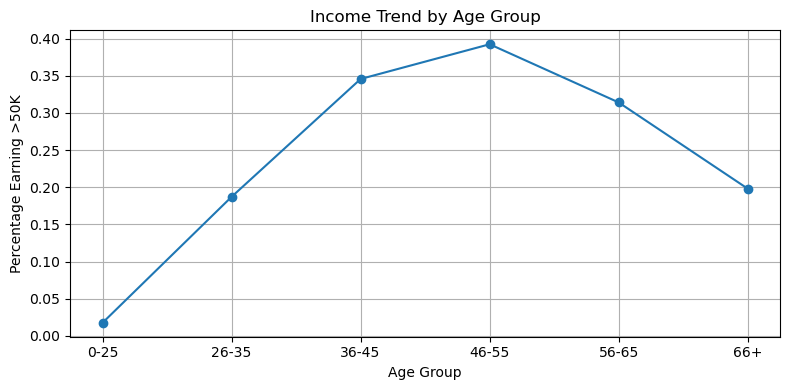

In [46]:
data['age_group'] = pd.cut(data['age'], bins=[0, 25, 35, 45, 55, 65, 90],
                           labels=['0-25', '26-35', '36-45', '46-55', '56-65', '66+'])
age_income = data.groupby('age_group')['income'].mean()
plt.figure(figsize=(8,4))
age_income.plot(kind='line', marker='o')
plt.title('Income Trend by Age Group')
plt.ylabel('Percentage Earning >50K')
plt.xlabel('Age Group')
plt.grid(True)
plt.tight_layout()
plt.show()